In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style("darkgrid")

# Data preparation 

In [3]:
df = pd.read_csv("cardionew.csv")
df = df.drop(["id"], axis=1)

# min-max-scaling continuous attribute (normalize)
scaler = MinMaxScaler()
df[["age", "height","weight","ap_hi","ap_lo"]] = scaler.fit_transform(df[["age", "height","weight","ap_hi","ap_lo"]])

# one-hot-encoding - div binary value
df = pd.get_dummies(df, columns=["cholesterol", "gender","gluc","smoke","alco","active"])

df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62,110,80,1,1,0,0,1,0
1,20228,1,156,85,140,90,3,1,0,0,1,1
2,18857,1,165,64,130,70,3,1,0,0,0,1
3,17623,2,169,82,150,100,1,1,0,0,1,1
4,17474,1,156,56,100,60,1,1,0,0,0,0


# Train-Test-Split

In [4]:
x = df.drop("cardio", axis=1).values
y = df.cardio.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

# Helper Functions

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(predictions, labels):
    N = labels.size 
    mse = ((predictions - labels)**2).sum() / (2*N)
    return mse

def accuracy(predictions, labels):
    predicions_correct = predictions.round() == labels
    accuracy = predicions_correct.mean()
    
    return accuracy

# Hyperparameters

In [6]:
learning_rate = 0.5
epochs = 10000

n_input = 19
n_hidden = 4
n_output = 1

# Weight Initialization

In [12]:
np.random.seed(10)
weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden))   # (19, 4)
weights_2 = np.random.normal(scale=0.5, size=(n_hidden, n_output))  # (4, 1)
#df.shape

# Training the Neural Network

In [8]:
N = y_train.size
monitoring = {"mean_squared_error": [], "accuracy": []}
for epoch in range(epochs):

    # feedforward
    hidden_layer = sigmoid(np.dot(x_train, weights_1))        # (899, 4)
    output_layer = sigmoid(np.dot(hidden_layer, weights_2))   # (899, 1)
    
    # monitor training process
    acc = accuracy(output_layer, y_train)
    mse = mean_squared_error(output_layer, y_train)
    monitoring["accuracy"].append(acc)
    monitoring["mean_squared_error"].append(mse)
 
    # backpropagation
    output_layer_delta = (output_layer - y_train) * output_layer * (1 - output_layer)                 # (712, 1)
    hidden_layer_delta = np.dot(output_layer_delta, weights_2.T) * hidden_layer * (1 - hidden_layer)  # (712, 4)

    # weight updates
    weights_2 -= learning_rate * np.dot(hidden_layer.T, output_layer_delta) / N   # (4, 1)
    weights_1 -= learning_rate * np.dot(x_train.T, hidden_layer_delta) / N        # (24, 4)

    if (epoch%100==0):
        print(f'Epoch:{epoch}, Accuracy:{acc}, Mean Squared Error:{mse}')

monitoring_df = pd.DataFrame(monitoring)

Epoch:0, Accuracy:0.49443757725587145, Mean Squared Error:0.1479247956468836
Epoch:100, Accuracy:0.6390605686032138, Mean Squared Error:0.12122395129298881
Epoch:200, Accuracy:0.6279357231149567, Mean Squared Error:0.1190520736725423
Epoch:300, Accuracy:0.6242274412855378, Mean Squared Error:0.11712905535267056
Epoch:400, Accuracy:0.6217552533992583, Mean Squared Error:0.11544648746466282
Epoch:500, Accuracy:0.6266996291718171, Mean Squared Error:0.11397132654844552
Epoch:600, Accuracy:0.6341161928306551, Mean Squared Error:0.11265129368197382
Epoch:700, Accuracy:0.6378244746600742, Mean Squared Error:0.11144304285124945
Epoch:800, Accuracy:0.6489493201483313, Mean Squared Error:0.11032121096732159
Epoch:900, Accuracy:0.6514215080346106, Mean Squared Error:0.10927165865018748
Epoch:1000, Accuracy:0.65389369592089, Mean Squared Error:0.10828450976671339
Epoch:1100, Accuracy:0.6588380716934487, Mean Squared Error:0.10735161287535684
Epoch:1200, Accuracy:0.6674907292954264, Mean Squared E

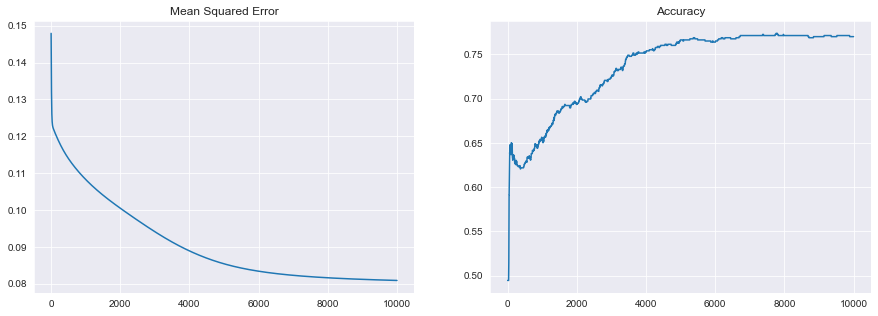

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

monitoring_df.mean_squared_error.plot(ax=axes[0], title="Mean Squared Error")
monitoring_df.accuracy.plot(ax=axes[1], title="Accuracy");

# Test Data

In [10]:
# feedforward
hidden_layer_inputs = np.dot(x_test, weights_1)
hidden_layer_outputs = sigmoid(hidden_layer_inputs)

output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
output_layer_outputs = sigmoid(output_layer_inputs)

In [11]:
acc = accuracy(output_layer_outputs, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.7555555555555555
